In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Chargement du dataset: 
import kagglehub
import os
import chardet
from tqdm.notebook import tqdm

path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
csv_file = os.path.join(path, "Sample - Superstore.csv")

with open(csv_file, "rb") as f:
    raw = f.read()

enc = chardet.detect(raw)
print(enc)

C:\Users\rokha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
df = pd.read_csv(csv_file, encoding="Windows-1252")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
from decimal import Decimal

# ---- ÉTAPE 1 : Nettoyer les noms de colonnes ----
def clean_columns(df):
    df = df.copy()
    
    # Nettoyage des noms de colonnes
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(r'[^\w\s]', '', regex=True)
                  .str.replace(r'\s+', '_', regex=True)
    )
    
    # 🔴 Suppression du colonne row_id (après nettoyage du nom)
    if "row_id" in df.columns:
        df = df.drop(columns=["row_id"])
    
    return df


# ---- ÉTAPE 2 : Conversion des types 
def convert_types(df):
    df = df.copy()
    
    # Conversion en string
    df['postal_code'] = df['postal_code'].astype(str)
    
    # Conversion en datetime
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
    
    # Conversion en float
    df['sales'] = df['sales'].astype(float)
    df['discount'] = df['discount'].astype(float)
    
    
    return df


# ---- ÉTAPE 3 : Pipeline complet ----
def pipeline(df):
    df = clean_columns(df)
    df = convert_types(df)
    
    # 🔹 Vérification et suppression des doublons
    print("Nombre de doublons avant suppression:", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Nombre de doublons après suppression:", df.duplicated().sum())
    
    return df


# ---- ÉTAPE 4 : Application du pipeline ----
df_cleaned = pipeline(df)

# Vérification
print(df_cleaned.dtypes)
print(df_cleaned.head())


Nombre de doublons avant suppression: 1
Nombre de doublons après suppression: 0
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code              object
region                   object
product_id               object
category                 object
subcategory              object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object
         order_id order_date  ship_date       ship_mode customer_id  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Cla

Ce projet consiste à mieux comprendre les ventes de SuperStore, ses produits, ses clients et ses performances logistiques pour maximiser le profit global, la gestion des stocks et des livraisons, identifier les clients et produits stratégiques et à prendre des décisions basées sur les données pour les promotions et les stratégies de vente.  

## Problèmatique: 
* Quels produits devraient être mis en avant pour maximiser le profit ? "prédiction du profit par commande"

* Quels clients devraient être ciblés pour des promotions personnalisées? "segmentation des clients" autrement-dit : identifier des groupes de clients à forte valeur ou clients à risque

In [10]:
df_cleaned.head(1)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [11]:
# Création de la colonne 'shipping_time' en jours
df_cleaned['shipping_time_days'] = (df_cleaned["ship_date"] - df_cleaned['order_date']).dt.days

# Vérification
df_cleaned[['order_date', 'ship_date', 'shipping_time_days']].head()


,order_date,ship_date,shipping_time_days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


In [12]:
df_cleaned.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'subcategory', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_time_days'],
      dtype='object')

* Analyse descriptive (KPIs)

In [13]:
# Chiffre d'affaire total et profit total

total_sales = df_cleaned['sales'].sum()
total_profit = df_cleaned['profit'].sum()
avg_discount = df_cleaned['discount'].mean()
avg_shipping_time = df_cleaned['shipping_time_days'].mean()

display(f"Total Sales: ${total_sales:,.2f}")
display(f"Total Profit: ${total_profit:,.2f}")
display(f"Average Discount: {avg_discount:.2%}")
display(f"Average Shipping Time: {avg_shipping_time:.2f} days")

'Total Sales: $2,296,919.49'

'Total Profit: $286,409.08'

'Average Discount: 15.62%'

'Average Shipping Time: 3.96 days'

In [14]:
df_cleaned.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_time_days
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,229.852846,3.789753,0.156188,28.660971,3.958171
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476,1.747654


* Analyse par Catégorie et Région

* Relation entre Discount et Profit: 

Que se passe-t-il pour le profit à chaque niveau de Discount ? 


In [15]:
df_cleaned['discount_bin'] = pd.cut(
    df_cleaned['discount'],
    bins=[-0.01, 0, 0.1, 0.2, 0.3, 1],
    labels=['0%', '0–10%', '10–20%', '20–30%', '30%+']
)

profit_by_discount = df_cleaned.groupby('discount_bin')['profit'].mean()
profit_by_discount


C:\Users\rokha\AppData\Local\Temp\ipykernel_592\2444379887.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount = df_cleaned.groupby('discount_bin')['profit'].mean()


discount_bin
0%         66.900292
0–10%      96.055074
10–20%     24.738824
20–30%    -45.828401
30%+     -107.209930
Name: profit, dtype: float64

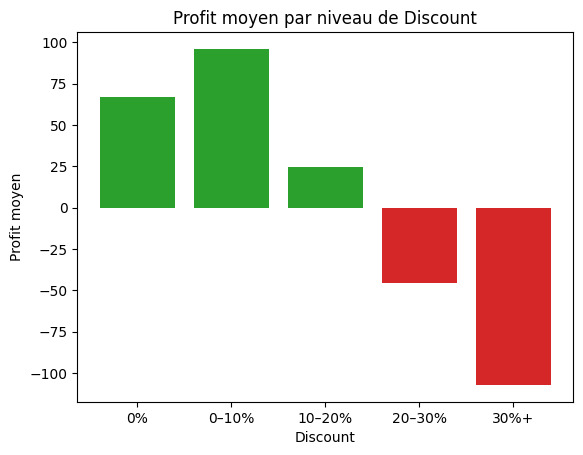

In [16]:
import matplotlib.pyplot as plt
 
colors = ['#2ca02c' if x >= 0 else '#d62728' for x in profit_by_discount.values]

plt.bar(profit_by_discount.index, profit_by_discount.values, color=colors)
plt.title("Profit moyen par niveau de Discount")
plt.xlabel("Discount")
plt.ylabel("Profit moyen")
plt.show()


In [17]:
correlation = df_cleaned['discount'].corr(
    df_cleaned['profit'],
    method='spearman'
)
print(f"Spearman Correlation: {correlation:.2f}")


Spearman Correlation: -0.54


# Relation entre Discount et Profit
* La relation entre le discount et le profit n'est pas linéaire. 
* Les faibles discounts(<= 10%) préservent généralement la rentabilité.
* Les discounts élevés (>= 20%) augmentent la volatilité et le risque de pertes. 
* L'impact du discount varie selon la catégorie de produits. 

# Conclusion: 
Une analyse par niveau de discount et par catégorie est plus pertinente qu'une corrélation globale. 



### Analyse des modes de livraison

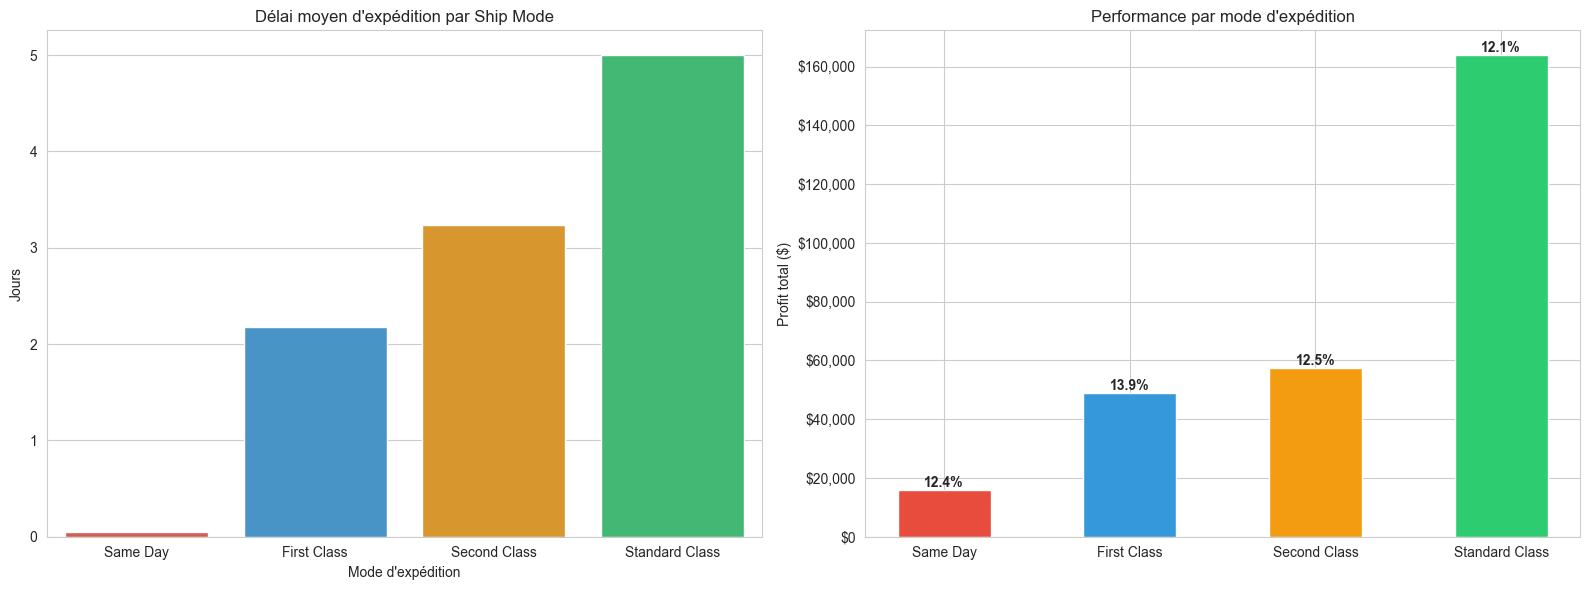

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Palette personnalisée par mode d’expédition
couleurs_ship = {
    "Same Day": "#E74C3C",        # rouge
    "First Class": "#3498DB",     # bleu
    "Second Class": "#F39C12",    # orange
    "Standard Class": "#2ECC71"   # vert
}

def dollar_format(x, pos):
    return f"${x:,.0f}"

# Calculer le délai moyen d'expédition
shipping_mode = df_cleaned.groupby('ship_mode')['shipping_time_days'].mean().sort_values()

# Trier les profits par mode d'expédition
perf_ship_sorted = perf_ship.sort_values("profit")

# Créer figure avec 2 axes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Subplot 1: Délai moyen d'expédition ---
sns.barplot(
    x=shipping_mode.index,
    y=shipping_mode.values,
    hue=shipping_mode.index,             # assigner hue pour palette
    palette=couleurs_ship,
    dodge=False,                         # éviter regroupement
    legend=False,                        # désactiver légende
    ax=axes[0]
)
axes[0].set_title("Délai moyen d'expédition par Ship Mode")
axes[0].set_ylabel("Jours")
axes[0].set_xlabel("Mode d'expédition")

# --- Subplot 2: Profit par mode d'expédition ---
bars = axes[1].bar(
    perf_ship_sorted.index,
    perf_ship_sorted["profit"],
    color=[couleurs_ship[m] for m in perf_ship_sorted.index],
    width=0.5
)
axes[1].yaxis.set_major_formatter(FuncFormatter(dollar_format))
axes[1].set_ylabel("Profit total ($)")
axes[1].set_title("Performance par mode d'expédition")

# Ajouter pourcentage au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_ship_sorted["% de profit"].iloc[i]
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


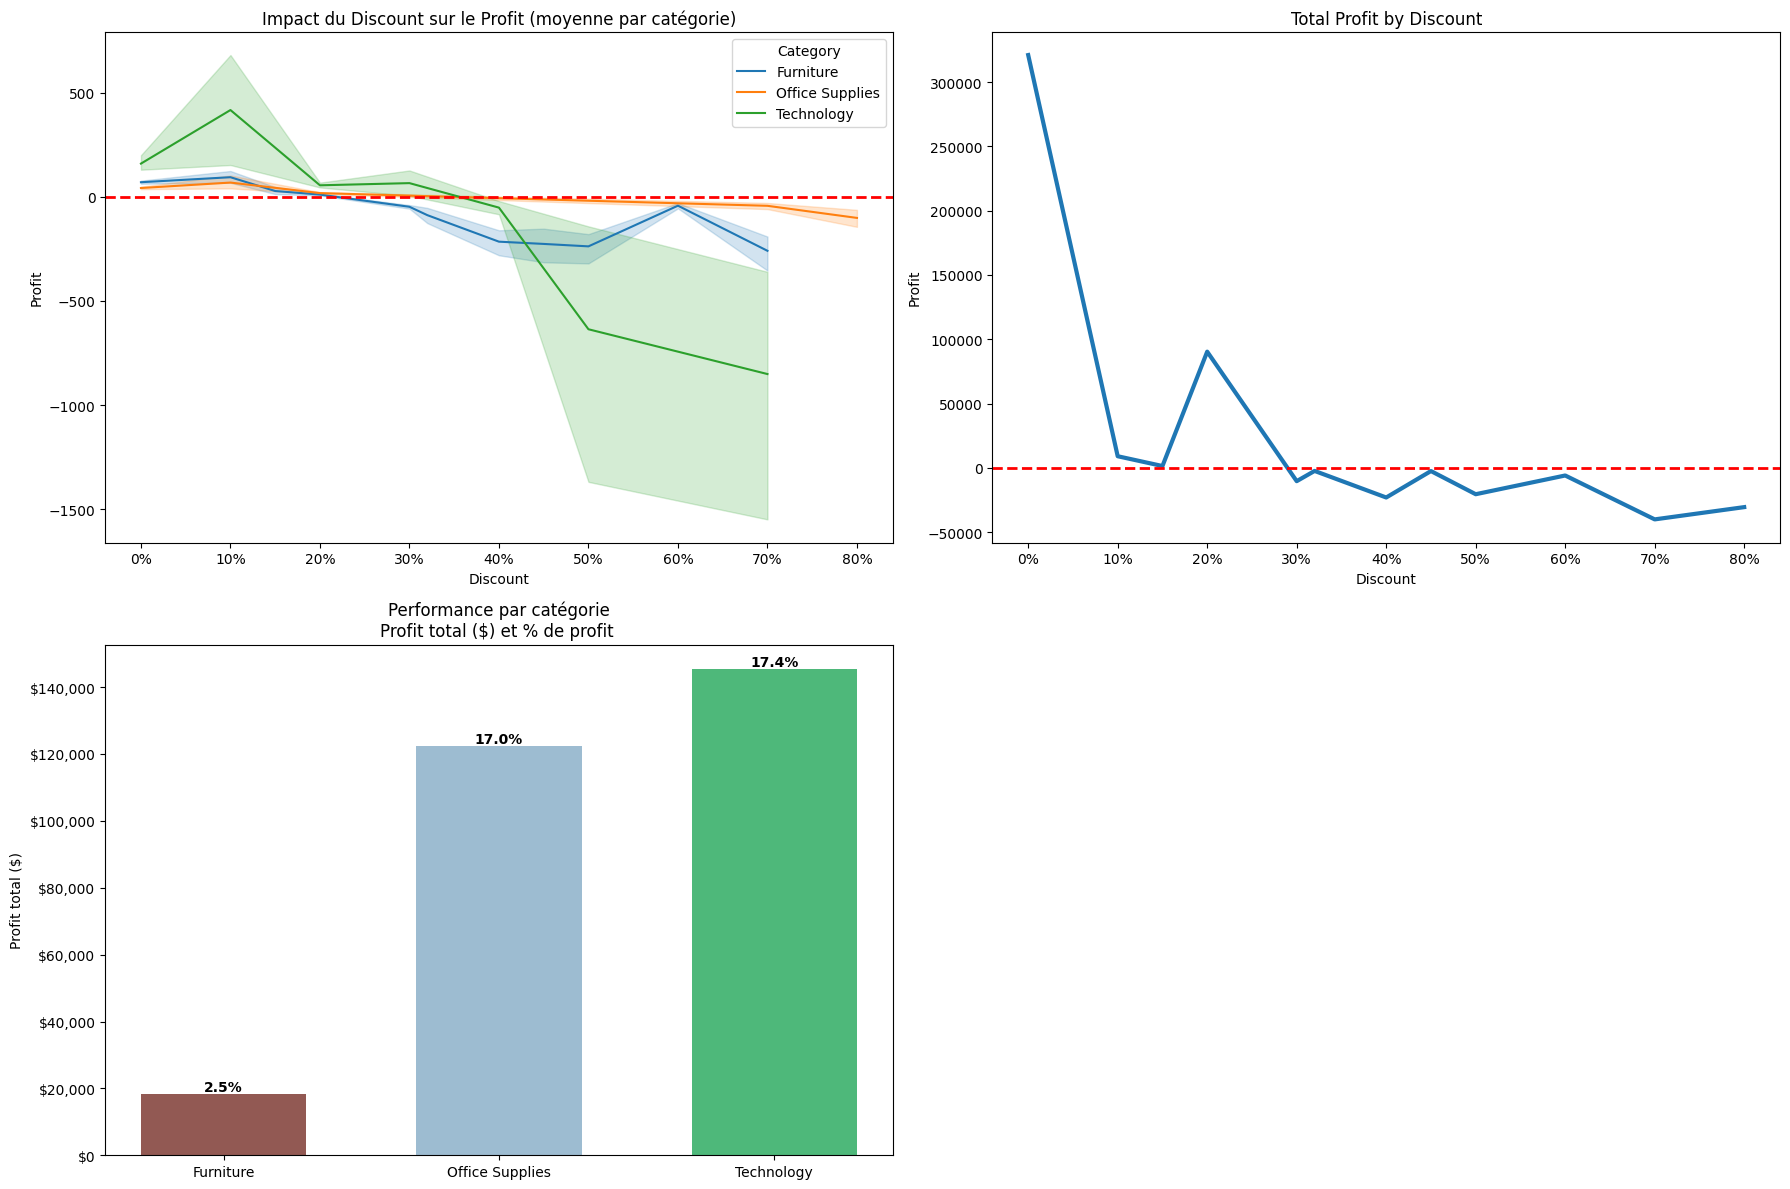

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

# 🔹 Couleurs pour les catégories
couleurs_cat = {
    "Furniture": "#925953",        # rouge
    "Office Supplies": "#9DBCD1",  # bleu
    "Technology": "#4EB87A"        # vert
}

# 🔹 Recalcul performance catégorie
perf_cat = (
    df_cleaned
    .groupby("category")[["sales","profit","discount"]]
    .sum()
)
perf_cat["% de profit"] = (perf_cat["profit"] / perf_cat["sales"]) * 100

# 🔹 Créer figure 2x2 pour avoir plus d'espace
fig, axes = plt.subplots(2, 2, figsize=(18,12))
axes = axes.flatten()  # pour itérer facilement

# --- Subplot 1: Lineplot profit moyen par catégorie ---
sns.lineplot(
    data=df_cleaned, 
    x="discount", 
    y="profit", 
    hue="category", 
    estimator="mean",
    ax=axes[0]
)
axes[0].axhline(0, linestyle="--", color="red", linewidth=2)
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[0].set_title("Impact du Discount sur le Profit (moyenne par catégorie)")
axes[0].set_xlabel("Discount")
axes[0].set_ylabel("Profit")
axes[0].legend(title="Category")

# --- Subplot 2: Lineplot profit total ---
sns.lineplot(
    data=df_cleaned,
    x="discount",
    y="profit",
    estimator=sum,
    errorbar=None,
    color="#1f77b4", 
    ax=axes[1],
    linewidth=3
)
axes[1].axhline(0, linestyle="--", color="red", linewidth=2)
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[1].set_title("Total Profit by Discount")
axes[1].set_xlabel("Discount")
axes[1].set_ylabel("Profit")

# --- Subplot 3: Barplot profit par catégorie ---
bars = axes[2].bar(
    perf_cat.index,
    perf_cat["profit"],
    color=[couleurs_cat[c] for c in perf_cat.index],
    width=0.6
)
axes[2].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
axes[2].set_ylabel("Profit total ($)")
axes[2].set_title("Performance par catégorie\nProfit total ($) et % de profit ")

# Ajouter % de profit au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_cat["% de profit"].iloc[i]
    axes[2].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold"
    )

# --- Subplot 4: vide pour équilibre ou future utilisation ---
axes[3].axis('off')

plt.tight_layout()
plt.show()


In [20]:
%whos

Variable             Type              Data/Info
------------------------------------------------
Decimal              type              <class 'decimal.Decimal'>
FuncFormatter        type              <class 'matplotlib.ticker.FuncFormatter'>
avg_discount         float64           0.1561883318322826
avg_shipping_time    float64           3.9581707195036526
axes                 ndarray           4: 4 elems, type `object`, 32 bytes
bar                  Rectangle         Rectangle(xy=(1.7, 0), wi<...>, height=145455, angle=0)
bars                 BarContainer      <BarContainer object of 3 artists>
chardet              module            <module 'chardet' from 'C<...>s\\chardet\\__init__.py'>
clean_columns        function          <function clean_columns at 0x000001E1ADD162A0>
colors               list              n=5
convert_types        function          <function convert_types at 0x000001E1ADD163E0>
correlation          float64           -0.5432212027467294
couleurs_cat         dict  

In [21]:
df_cleaned.shape
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9993 non-null   object        
 1   order_date          9993 non-null   datetime64[ns]
 2   ship_date           9993 non-null   datetime64[ns]
 3   ship_mode           9993 non-null   object        
 4   customer_id         9993 non-null   object        
 5   customer_name       9993 non-null   object        
 6   segment             9993 non-null   object        
 7   country             9993 non-null   object        
 8   city                9993 non-null   object        
 9   state               9993 non-null   object        
 10  postal_code         9993 non-null   object        
 11  region              9993 non-null   object        
 12  product_id          9993 non-null   object        
 13  category            9993 non-null   object        
 1

,order_date,ship_date,sales,quantity,discount,profit,shipping_time_days
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,229.852846,3.789753,0.156188,28.660971,3.958171
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7.000000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476,1.747654


Analyse du Profit


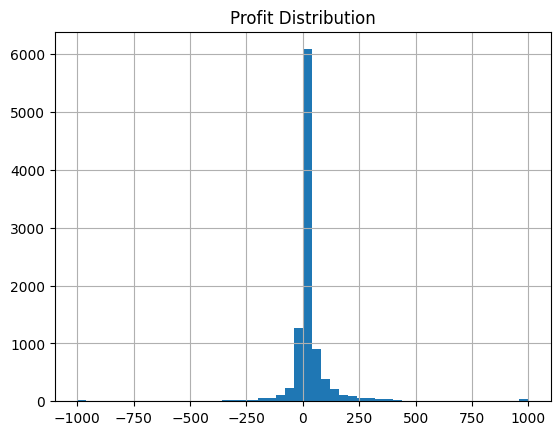

In [22]:
"Distribution du profit "

import matplotlib.pyplot as plt

plt.figure()
df_cleaned["profit"].clip(-1000, 1000).hist(bins=50)
plt.title("Profit Distribution")
plt.show()



Beaucoup de ventes génèrent peu de profit

Quelques ventes génèrent de fortes pertes

La rentabilité est instable

Analyse des pertes

In [23]:
nb_pertes = (df_cleaned["profit"] < 0).sum()
nb_total = len(df_cleaned)

taux_perte = (nb_pertes / nb_total) * 100

print(f"Nombre de transactions déficitaires : {nb_pertes}")
print(f"Nombre total de transactions : {nb_total}")
print(f"Taux de perte : {taux_perte:.2f}%")


Nombre de transactions déficitaires : 1870
Nombre total de transactions : 9993
Taux de perte : 18.71%


Environ 18,7 % des transactions génèrent une perte.
Cela indique qu’une part non négligeable des ventes impacte négativement la rentabilité globale.

Analyse remise vs Profit

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Création des tranches
bins = np.linspace(0, 0.8, 9)
df_cleaned["discount_bin_curve"] = pd.cut(df_cleaned["discount"], bins)

In [25]:
profit_moyen = df_cleaned.groupby(
    "discount_bin_curve", observed=False
)["profit"].mean()


In [26]:
labels_percent = [
    f"{int(interval.left*100)}–{int(interval.right*100)}%"
    for interval in profit_moyen.index
]


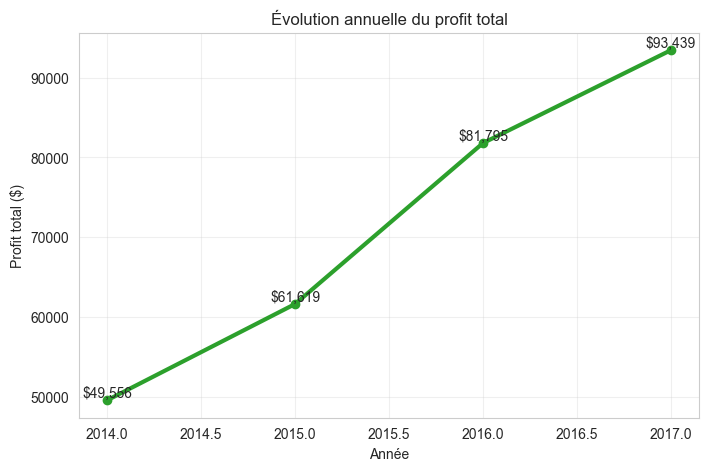

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
profit_annuel.plot(marker="o", linewidth=3, color="#2ca02c")

for i, value in enumerate(profit_annuel):
    plt.text(profit_annuel.index[i], value, f"${value:,.0f}",
             ha="center", va="bottom")

plt.title("Évolution annuelle du profit total")
plt.xlabel("Année")
plt.ylabel("Profit total ($)")
plt.grid(alpha=0.3)
plt.show()

Le profit moyen diminue fortement lorsque la remise dépasse 20 %.
Les remises supérieures à 30 % génèrent en moyenne des pertes significatives.

In [28]:
df_cleaned["order_date"] = pd.to_datetime(df_cleaned["order_date"])


In [29]:
df_cleaned["year"] = df_cleaned["order_date"].dt.year


In [30]:
profit_annuel = df_cleaned.groupby("year")["profit"].sum()

profit_annuel


year
2014    49556.0329
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: profit, dtype: float64

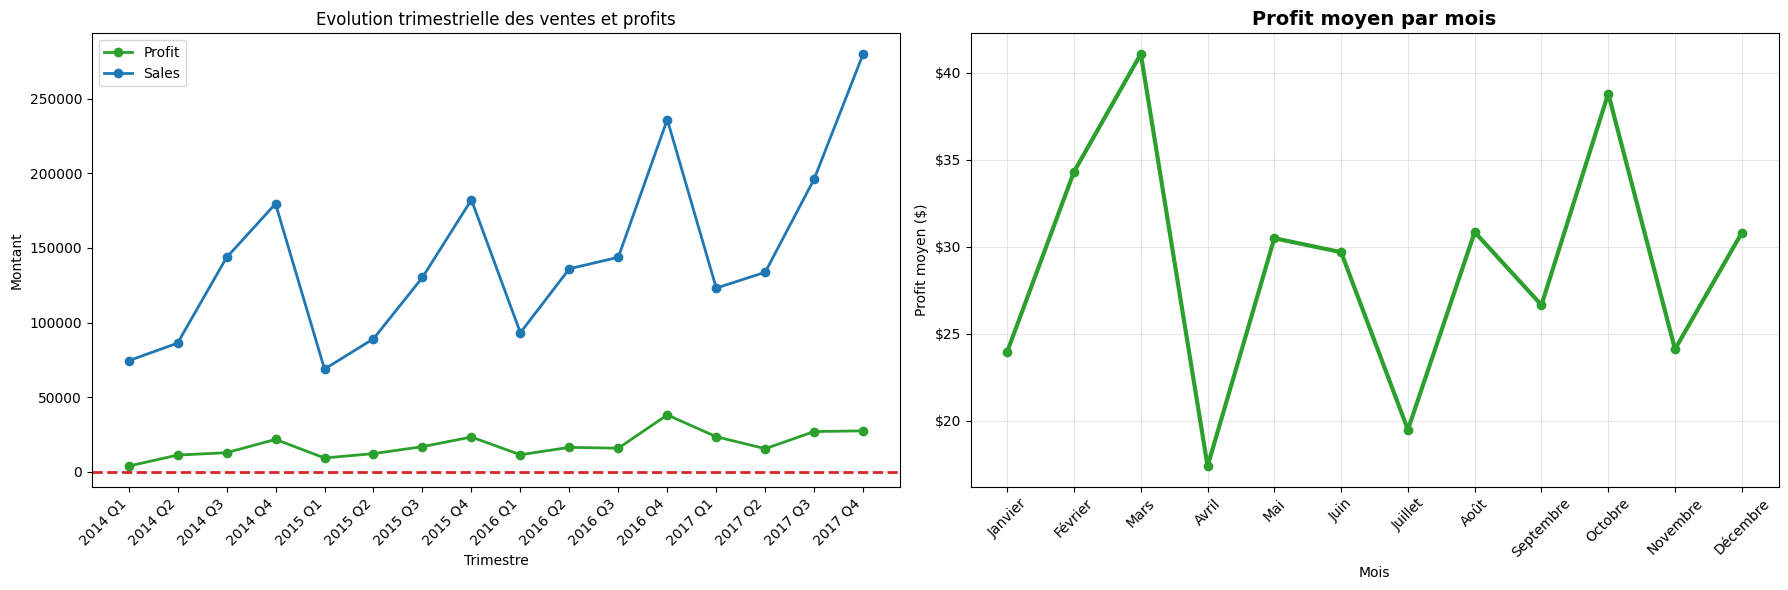

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 🔹 Sécuriser format date
df_cleaned["order_date"] = pd.to_datetime(df_cleaned["order_date"])

# ===== 1. Evolution trimestrielle des ventes et profits =====
quarterly = (
    df_cleaned
    .set_index("order_date")
    .resample("QE")[["sales", "profit"]]
    .sum()
)
quarterly["year"] = quarterly.index.year
quarterly["quarter"] = quarterly.index.quarter
labels_quarter = quarterly["year"].astype(str) + " Q" + quarterly["quarter"].astype(str)
x_quarter = range(len(quarterly))

# ===== 2. Profit moyen mensuel =====
df_cleaned["month"] = df_cleaned["order_date"].dt.month
mois_fr = {
    1: "Janvier", 2: "Février", 3: "Mars", 4: "Avril",
    5: "Mai", 6: "Juin", 7: "Juillet", 8: "Août",
    9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Décembre"
}
profit_mensuel = (
    df_cleaned
    .groupby("month")["profit"]
    .mean()
    .reindex(range(1,13))
)
profit_mensuel.index = [mois_fr[i] for i in range(1,13)]

def dollar_format(x, pos):
    return f"${x:,.0f}"

# ===== Créer figure 1x2 =====
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# --- Subplot 1: Evolution trimestrielle (Profit vert, Sales bleu) ---
axes[0].plot(x_quarter, quarterly["profit"], label="Profit", linewidth=2, marker="o", color="#2ca02c")
axes[0].plot(x_quarter, quarterly["sales"], label="Sales", linewidth=2, marker="o", color="#1f77b4")
axes[0].axhline(0, linestyle="--", color="#d62728", linewidth=2)
axes[0].set_xticks(x_quarter)
axes[0].set_xticklabels(labels_quarter, rotation=45, ha="right")
axes[0].set_title("Evolution trimestrielle des ventes et profits")
axes[0].set_xlabel("Trimestre")
axes[0].set_ylabel("Montant")
axes[0].legend()

# --- Subplot 2: Profit moyen mensuel ---
axes[1].plot(profit_mensuel.index, profit_mensuel.values, marker="o", linewidth=3, color="#2ca02c")
axes[1].set_title("Profit moyen par mois", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Mois")
axes[1].set_ylabel("Profit moyen ($)")
axes[1].yaxis.set_major_formatter(FuncFormatter(dollar_format))
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


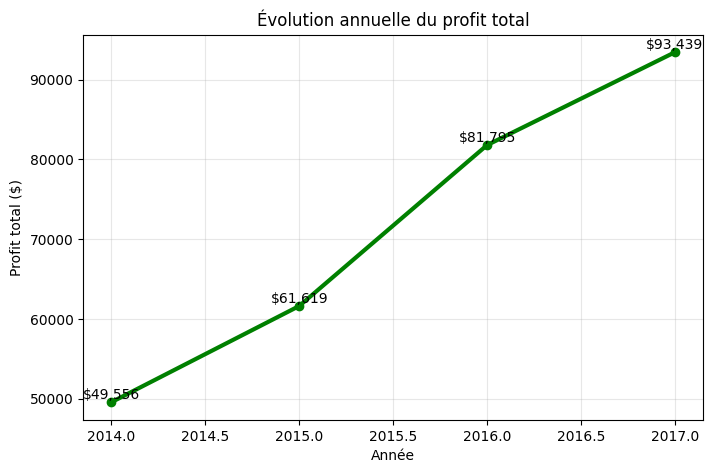

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
profit_annuel.plot(marker="o", linewidth=3, color="green")

for i, value in enumerate(profit_annuel):
    plt.text(profit_annuel.index[i], value, f"${value:,.0f}",
             ha="center", va="bottom")

plt.title("Évolution annuelle du profit total")
plt.xlabel("Année")
plt.ylabel("Profit total ($)")
plt.grid(alpha=0.3)
plt.show()



In [33]:
"croissance annuelle"

croissance = profit_annuel.pct_change() * 100
croissance

year
2014          NaN
2015    24.341276
2016    32.744284
2017    14.235675
Name: profit, dtype: float64

In [34]:
df_cleaned["order_date"].dt.month.value_counts().sort_index()

order_date
1      381
2      300
3      696
4      667
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

Le profit moyen atteint environ 41 en mars, contre seulement 17  en avril, indiquant une forte variabilité saisonnière.

Analyse : profit total + Marge (%)

In [35]:
# Agrégation
perf_cat = df_cleaned.groupby("category").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
})

# Calcul de la marge
perf_cat["% de profit"] = (perf_cat["profit"] / perf_cat["sales"]) * 100

perf_cat

,sales,profit,discount,% de profit
category,,,,
Furniture,741718.4233,18463.3316,0.173863,2.489264
Office Supplies,719047.0320,122490.8008,0.157285,17.035158
Technology,836154.0330,145454.9481,0.132323,17.395712


Marge très faible : 2.49 %, la remise n'est pas adaptée si on veux faire du profit sur les fournitures

Technology = forte rentabilité

Furniture = faible marge → sensible aux remises

Office Supplies = stable

Analyse par Région 

In [36]:
# Agrégation région
perf_region = df_cleaned.groupby("region").agg({
    "sales": "sum",
    "profit": "sum",
    "discount": "mean"
})

# Marge %
perf_region["% de profit"] = (perf_region["profit"] / perf_region["sales"]) * 100

# Taux de perte
df_cleaned["loss"] = (df_cleaned["profit"] < 0).astype(int)
loss_rate = df_cleaned.groupby("region")["loss"].mean() * 100

perf_region["taux_perte_%"] = loss_rate

perf_region


,sales,profit,discount,% de profit,taux_perte_%
region,,,,,
Central,501239.8908,39706.3625,0.240353,7.921629,31.898407
East,678499.8680,91534.8388,0.145311,13.490767,19.388830
South,391721.9050,46749.4303,0.147253,11.934342,15.987654
West,725457.8245,108418.4489,0.109335,14.944831,9.928192


In [37]:
# Trier par profit croissant
perf_region_sorted = perf_region.sort_values("profit")


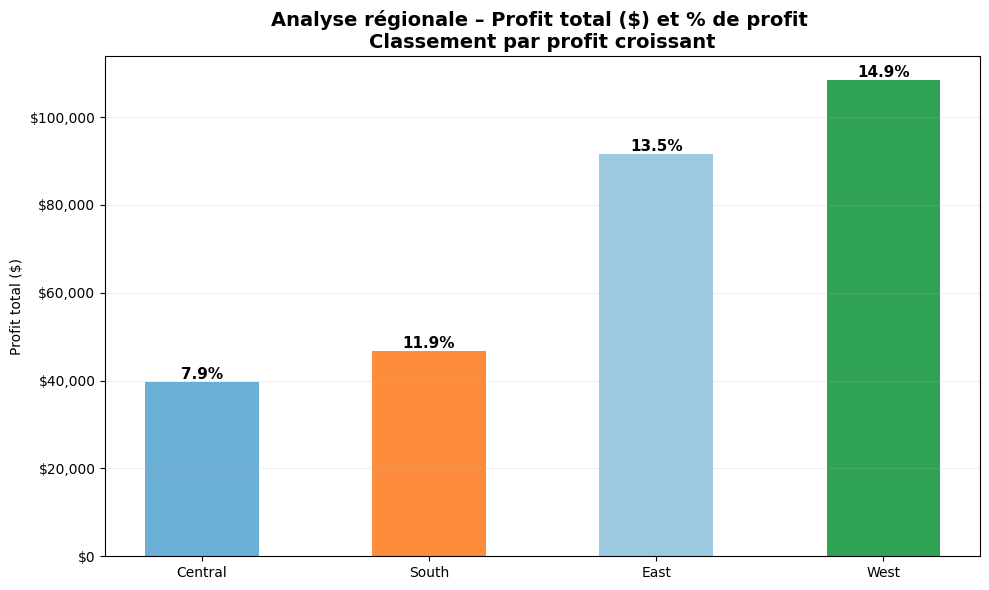

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Trier par profit croissant
perf_region_sorted = perf_region.sort_values("profit")

# Couleurs différentes par région
couleurs = {
    "Central": "#6BAED6",
    "South": "#FD8D3C",
    "East": "#9ECAE1",
    "West": "#31A354"
}

def dollar_format(x, pos):
    return f"${x:,.0f}"

fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(
    perf_region_sorted.index,
    perf_region_sorted["profit"],
    color=[couleurs[r] for r in perf_region_sorted.index],
    width=0.5
)

ax1.yaxis.set_major_formatter(FuncFormatter(dollar_format))
ax1.set_ylabel("Profit total ($)")

# Ajouter marge % au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    marge = perf_region_sorted["% de profit"].iloc[i]
    
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{marge:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.title("Analyse régionale – Profit total ($) et % de profit \nClassement par profit croissant",
          fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


Remise moyenne par Région 

In [39]:
df_cleaned.groupby("region")["discount"].mean()

region
Central    0.240353
East       0.145311
South      0.147253
West       0.109335
Name: discount, dtype: float64

La sous-performance de la région Central s’explique par un niveau de remise significativement supérieur (24 %) aux autres régions. Cette politique commerciale impacte directement la marge, réduite à 7.9 %.

Profit par mode d’expédition                                                                                            , Es-ce que le mode de livraison a un impact sur la marge.

In [40]:
perf_ship = df_cleaned.groupby("ship_mode").agg({
    "sales": "sum",
    "profit": "sum",
    "shipping_time_days": "mean"
})

perf_ship["% de profit"] = (perf_ship["profit"] / perf_ship["sales"]) * 100

perf_ship.sort_values("profit")


,sales,profit,shipping_time_days,% de profit
ship_mode,,,,
Same Day,1.283631e+05,15891.7589,0.044199,12.380315
First Class,3.514284e+05,48969.8399,2.182705,13.934513
Second Class,4.591936e+05,57446.6354,3.238046,12.510331
Standard Class,1.357934e+06,164100.8463,5.006704,12.084593


Contrairement à la politique de remise, le mode d’expédition n’impacte pas significativement la rentabilité. La performance logistique est globalement équilibrée entre les différents services

In [41]:
df_cleaned[["shipping_time_days","profit"]].corr(method="spearman")

,shipping_time_days,profit
shipping_time_days,1.000000,-0.007013
profit,-0.007013,1.000000


C’est quasi zéro  -0.007   
 Il n’existe aucune relation significative entre :le délai de livraison et  le profit

In [42]:
df_cleaned.groupby("shipping_time_days")["profit"].mean()

shipping_time_days
0    29.645411
1    20.436929
2    39.818676
3    26.742208
4    25.656990
5    27.078471
6    27.660821
7    32.740494
Name: profit, dtype: float64

Pas de tendance claire, correlation nulle

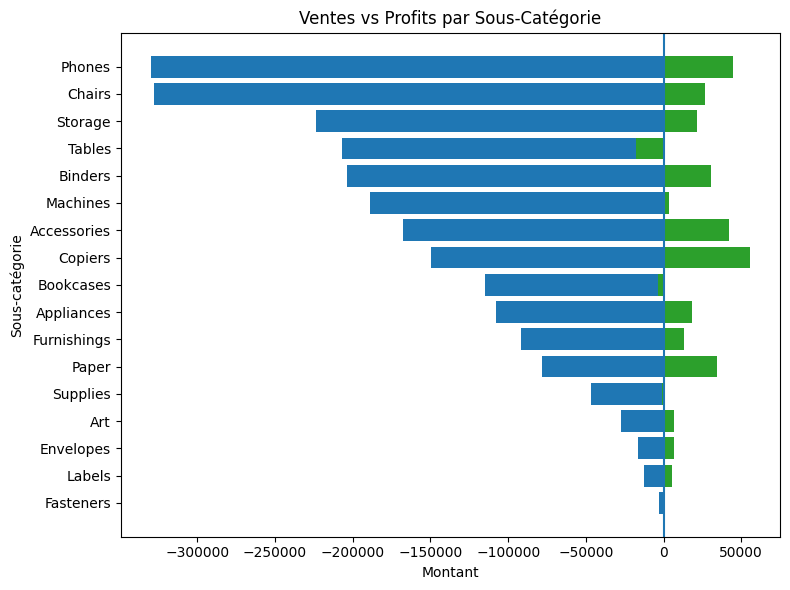

In [43]:
# ===== Ventes vs Profits par Sous-Catégorie =====

subcat = (
    df_cleaned
    .groupby("subcategory")[["sales", "profit"]]
    .sum()
    .sort_values("sales")
)

sales = -subcat["sales"]   # gauche
profit = subcat["profit"]  # droite

plt.figure(figsize=(8,6))

plt.barh(subcat.index, sales, color="#1f77b4")
plt.barh(subcat.index, profit, color="#2ca02c")

plt.axvline(0)

plt.title("Ventes vs Profits par Sous-Catégorie")
plt.xlabel("Montant")
plt.ylabel("Sous-catégorie")

plt.tight_layout()
plt.show()

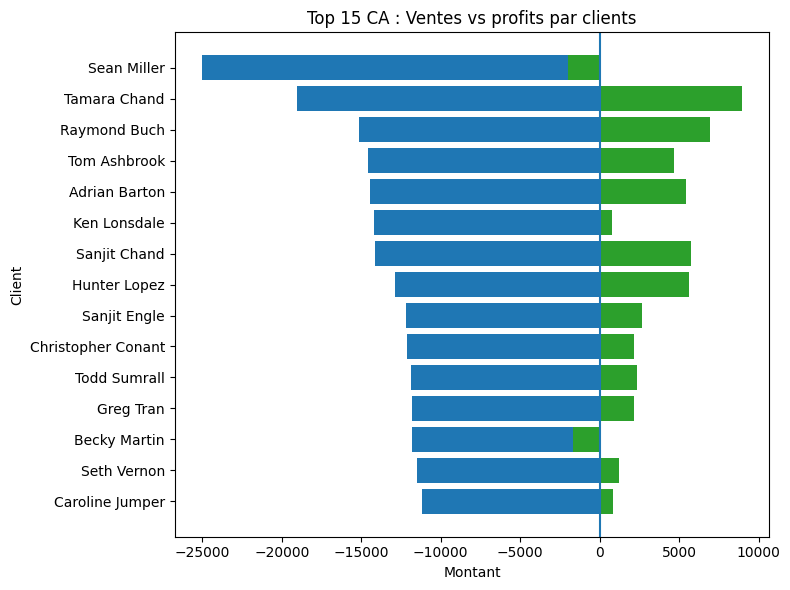

In [44]:
# ===== Top 15 CA : Ventes vs Profits par Clients =====

top_clients = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .sort_values("sales", ascending=False)
    .head(15)
)

# Trier pour affichage horizontal propre
top_clients = top_clients.sort_values("sales")

sales = -top_clients["sales"]   # ventes à gauche
profit = top_clients["profit"]  # profits à droite

plt.figure(figsize=(8,6))

plt.barh(top_clients.index, sales, color="#1f77b4")
plt.barh(top_clients.index, profit, color="#2ca02c")

plt.axvline(0)

plt.title("Top 15 CA : Ventes vs profits par clients")
plt.xlabel("Montant")
plt.ylabel("Client")

plt.tight_layout()
plt.show()

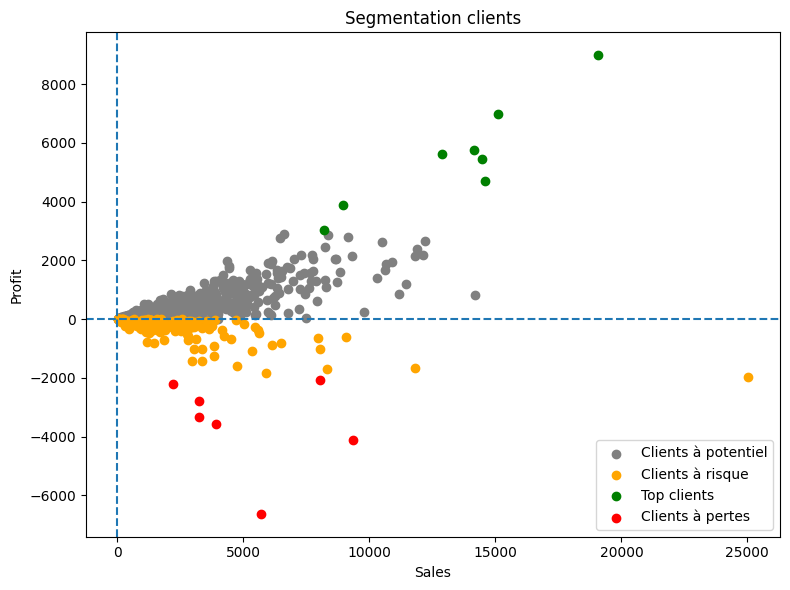

In [45]:
import matplotlib.pyplot as plt

client_perf = (
    df_cleaned
    .groupby("customer_name")[["sales", "profit"]]
    .sum()
    .reset_index()
)

def segment(row):
    if row["profit"] <= -2000:
        return "Clients à pertes"
    elif -2000 < row["profit"] < 0:
        return "Clients à risque"
    elif row["profit"] >= 3000:
        return "Top clients"
    else:
        return "Clients à potentiel"

client_perf["segment"] = client_perf.apply(segment, axis=1)

colors_map = {
    "Clients à pertes": "red",
    "Top clients": "green",
    "Clients à risque": "#FFA500",       # orange par défaut
    "Clients à potentiel": "#808080"     # gris par défaut
}

plt.figure(figsize=(8,6))

for s in client_perf["segment"].unique():
    subset = client_perf[client_perf["segment"] == s]
    plt.scatter(
        subset["sales"], 
        subset["profit"], 
        label=s, 
        color=colors_map[s]
    )

plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle="--")

plt.title("Segmentation clients")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
# Construction RFM


# Date de référence (lendemain de la dernière commande)
ref_date = df_cleaned['order_date'].max() + pd.Timedelta(days=1)


# Construction RFM
rfm = (
   df_cleaned
   .groupby('customer_id')
   .agg({
       'order_date': lambda x: (ref_date - x.max()).days,  # Recency
       'order_id': 'nunique',                              # Frequency
       'sales': 'sum'                                      # Monetary
   })
   .rename(columns={
       'order_date': 'Recency',
       'order_id': 'Frequency',
       'sales': 'Monetary'
   })
)


rfm.head()


,Recency,Frequency,Monetary
customer_id,,,
AA-10315,185,5,5563.560
AA-10375,20,9,1056.390
AA-10480,260,4,1790.512
AA-10645,56,6,5086.935
AB-10015,416,3,886.156


- Recency = nombre de jours depuis la dernière commande
- Frequency = nombre de commandes
- Monetary = chiffre d'affaires total du client


In [47]:
rfm.describe().round(2)


,Recency,Frequency,Monetary
count,793.00,793.00,793.00
mean,147.80,6.32,2896.49
std,186.21,2.55,2628.41
min,1.00,1.00,4.83
25%,31.00,5.00,1146.05
50%,76.00,6.00,2256.39
75%,184.00,8.00,3785.28
max,1166.00,17.00,25043.05


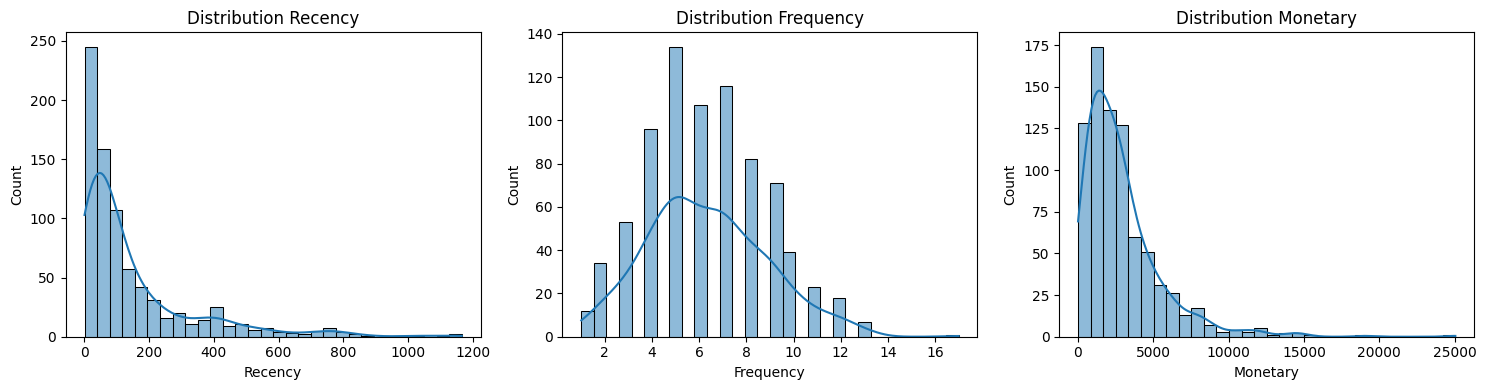

In [48]:

plt.figure(figsize=(15,4))


plt.subplot(1,3,1)
sns.histplot(rfm["Recency"], bins=30, kde=True)
plt.title("Distribution Recency")


plt.subplot(1,3,2)
sns.histplot(rfm["Frequency"], bins=30, kde=True)
plt.title("Distribution Frequency")


plt.subplot(1,3,3)
sns.histplot(rfm["Monetary"], bins=30, kde=True)
plt.title("Distribution Monetary")


plt.tight_layout()
plt.show()



### Machine learning : Kmeans methode

Objectif : Segmenter les clients selon leur contribution au profit selon :  
✔ rentabilité  
✔ fréquence  
✔ panier moyen  
✔ remise

In [49]:
# =============================================================
# Création d'un dataframe avec données agrégées par customer_id
# =============================================================

client_features = (
    df_cleaned
    .groupby("customer_id")
    .agg({
        "profit": "sum",          # rentabilité totale
        "order_id": "nunique",    # fréquence d'achat
        "sales": "mean",          # panier moyen
        "discount": "mean"        # remise moyenne
    })
    .rename(columns={
        "profit": "total_profit",
        "order_id": "nb_orders",
        "sales": "avg_basket",
        "discount": "avg_discount"
    })
    .round(2)
)

client_features.head()


,total_profit,nb_orders,avg_basket,avg_discount
customer_id,,,,
AA-10315,-362.88,5,505.78,0.09
AA-10375,277.38,9,70.43,0.08
AA-10480,435.83,4,149.21,0.02
AA-10645,857.80,6,282.61,0.06
AB-10015,129.35,3,147.69,0.07


In [50]:
# ================================================
# Scaling des variables (normalisation)
# ================================================

from sklearn.preprocessing import RobustScaler

# Initialisation du scaler robuste (moins sensible aux outliers)
scaler = RobustScaler()

# Mise à l'échelle des variables pour éviter qu'une variable domine le clustering
X_scaled = scaler.fit_transform(client_features)

In [51]:
# ================================================
# Détection des clients très atypiques
# ================================================

from sklearn.ensemble import IsolationForest

# On crée le modèle
# contamination = on estime que 3% des clients sont très différents des autres
iso = IsolationForest(contamination=0.03, random_state=42)

# Le modèle analyse les données normalisées
# Il attribue :
# 1  → client "normal"
# -1 → client "atypique"
outliers = iso.fit_predict(X_scaled)

# On ajoute le résultat dans le tableau des clients
client_features["outlier"] = outliers


In [52]:
# ================================================
# Suppression des clients atypiques
# ================================================

# On garde uniquement les clients considérés comme "normaux" (outlier = 1)
X_clean = X_scaled[client_features["outlier"] == 1]

# On garde aussi leur version lisible (non normalisée) pour l’analyse
client_clean = client_features[client_features["outlier"] == 1].copy()


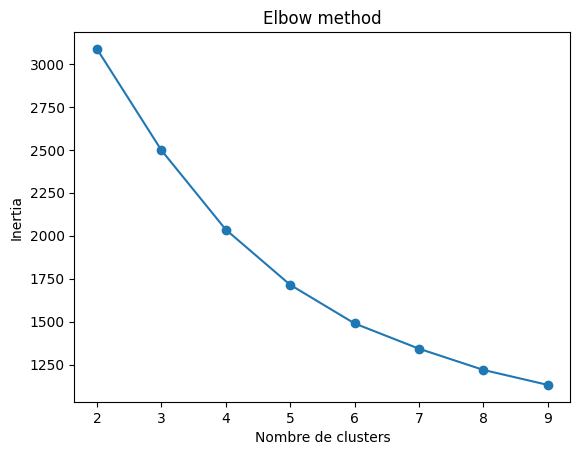

In [53]:
# ================================================
# Méthode Elbow
# ================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled) # entraînement du modèle
    inertia.append(kmeans.inertia_) # distance totale des points à leur centre de cluster

plt.figure()
plt.plot(range(2, 10), inertia, marker="o")
plt.title("Elbow method")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.show()

k = 2 | Silhouette Score = 0.486
k = 3 | Silhouette Score = 0.381
k = 4 | Silhouette Score = 0.407
k = 5 | Silhouette Score = 0.237
k = 6 | Silhouette Score = 0.242
k = 7 | Silhouette Score = 0.247
k = 8 | Silhouette Score = 0.254
k = 9 | Silhouette Score = 0.255


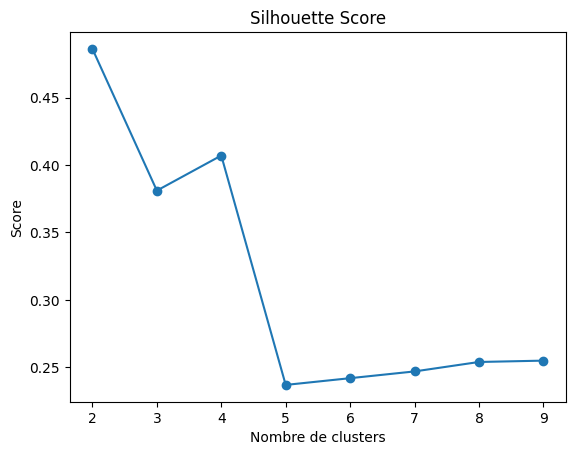

In [54]:
# ============================
# Méthode du Silhouette Score
# ============================

from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(round(score, 3))

# Affichage des scores
for k, score in zip(K_range, silhouette_scores):
    print(f"k = {k} | Silhouette Score = {score}")

# Graphique
plt.figure()
plt.plot(K_range, silhouette_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.show()

In [55]:
# ================================================
# Clustering final avec k = 4
# ================================================

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Entraînement + attribution des clusters
clusters = kmeans.fit_predict(X_clean)

client_clean["cluster"] = clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_clean)

client_clean["pca_1"] = X_pca[:, 0]
client_clean["pca_2"] = X_pca[:, 1]
client_clean["pca_3"] = X_pca[:, 2]


import plotly.express as px

fig = px.scatter_3d(
    client_clean,
    x="pca_1",
    y="pca_2",
    z="pca_3",
    color="cluster",
    title="Segmentation clients (4 clusters)",
    opacity=0.7
)

fig.show()


In [56]:
cluster_profile = (
    client_clean
        .groupby("cluster")
        .agg({col: "mean" for col in ["total_profit","nb_orders","avg_basket","avg_discount"]})
        .round(2)
)

cluster_profile["nb_clients"] = client_clean.groupby("cluster").size()

print(cluster_profile)

         total_profit  nb_orders  avg_basket  avg_discount  nb_clients
cluster                                                               
0              305.47       8.88      170.35          0.17         215
1             1368.86       7.71      401.08          0.12         115
2              279.86       4.61      179.41          0.09         249
3             -197.57       5.04      172.09          0.24         190


In [57]:
df0 = client_clean[client_clean["cluster"] == 0].copy()
df1 = client_clean[client_clean["cluster"] == 1].copy()
df2 = client_clean[client_clean["cluster"] == 2].copy()
df3 = client_clean[client_clean["cluster"] == 3].copy()

Cluster 0 → le mettre en valeur dans Streamlit :

Profil moyen

Distribution des variables

Comparaison vs autres clusters

Positionnement PCA

Taille du segment

In [58]:
df0 = client_clean[client_clean["cluster"] == 0].copy()

1. Taille du segment

In [59]:
nb_cluster0 = len(df0)
total_clients = len(client_clean)

print(f"Cluster 0 représente {round(nb_cluster0/total_clients*100,2)}% des clients")


Cluster 0 représente 27.96% des clients


2. Profil moyen du cluster 0

In [60]:
profile_0 = df0[["total_profit","nb_orders","avg_basket","avg_discount"]].mean().round(2)
print(profile_0)

total_profit    305.47
nb_orders         8.88
avg_basket      170.35
avg_discount      0.17
dtype: float64


3. Comparaison cluster 0 vs autres

In [61]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

features = ["total_profit", "nb_orders", "avg_basket", "avg_discount"]

# On prend les moyennes par cluster
cluster_means = cluster_profile[features]

# Normalisation 0-1
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_means)

cluster_scaled_df = pd.DataFrame(cluster_scaled, 
                                 columns=features, 
                                 index=cluster_means.index)

# Radar pour cluster 0
values = cluster_scaled_df.loc[0].values.tolist()
values += values[:1]

labels = features + [features[0]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=labels,
    fill='toself',
    name="Cluster 0"
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0,1])),
    title="Profil Radar Normalisé - Cluster 0"
)

fig.show()



Heatmap des profils de clusters

In [85]:
import plotly.graph_objects as go
import numpy as np

cols = ["total_profit", "nb_orders", "avg_basket", "avg_discount"]

cluster_profile = (
    client_clean
    .groupby("cluster")[cols]
    .mean()
    .round(2)
)

# Détection max/min
max_mask = cluster_profile.eq(cluster_profile.max())
min_mask = cluster_profile.eq(cluster_profile.min())

# Palette claire personnalisée
colorscale = [
    [0, "#f7fbff"],
    [0.5, "#c6dbef"],
    [1, "#6baed6"]
]

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=cluster_profile.values,
    x=cluster_profile.columns,
    y=cluster_profile.index,
    colorscale=colorscale,
    text=cluster_profile.values,
    texttemplate="%{text}",
    colorbar=dict(title="Valeur")
))

# Encadrement discret
for i in range(cluster_profile.shape[0]):
    for j in range(cluster_profile.shape[1]):

        if max_mask.iloc[i, j]:
            fig.add_shape(
                type="rect",
                x0=j-0.5, x1=j+0.5,
                y0=i-0.5, y1=i+0.5,
                line=dict(color="green", width=3)
            )

        if min_mask.iloc[i, j]:
            fig.add_shape(
                type="rect",
                x0=j-0.5, x1=j+0.5,
                y0=i-0.5, y1=i+0.5,
                line=dict(color="red", width=3)
            )

fig.update_layout(
    title="Profil réel des clusters (K=4)",
    title_x=0.5
)

fig.show()


Un cluster VIP (Cluster 1)

Un cluster fidèle à optimiser (Cluster 0)

Un cluster passif (Cluster 2)

Un cluster destructeur de marge (Cluster 3)

🟢 Cluster 1 → ⭐ Les meilleurs clients

Profit le plus élevé (1368.86)

Panier moyen le plus élevé (401.08)

Fréquence élevée (7.71)

Remise modérée (0.12)

👉 Interprétation business :
Clients très rentables, panier élevé, bonne fréquence, sans trop de remise.

🎯 Ce sont les clients VIP.
👉 Stratégie : fidélisation, programme premium, avantages exclusifs.



🔵 Cluster 0 → 🔁 Clients fidèles à panier moyen

Profit correct (305.47)

🟢 Fréquence la plus élevée (8.88)

Panier moyen faible (170.35)

Remise moyenne (0.17)

👉 Clients réguliers mais petits paniers.

🎯 Stratégie :

Cross-sell

Upsell

Augmenter le panier moyen




🟡 Cluster 2 → 💸 Clients discrets / neutres

Profit moyen (279.86)

Fréquence la plus faible (4.61)

Panier moyen moyen (179.41)

Remise la plus faible (0.09)

👉 Peu engagés mais pas problématiques.

🎯 Stratégie :

Relance marketing

Campagnes activation



🔴 Cluster 3 → ⚠️ Clients à risque

Profit négatif (-197.57)

Fréquence faible (5.04)

Panier moyen faible (172.09)

Remise la plus élevée (0.24)

👉 Ils achètent surtout avec remise et détruisent la marge.

🎯 Stratégie :

Limiter promotions

Revoir politique de remise

Peut-être exclure certaines offres

4. Distribution des variables

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde

variables = ["total_profit", "nb_orders", "avg_basket", "avg_discount"]

colors = ["#4C78A8", "#F58518", "#54A24B", "#B279A2"]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[v.replace("_", " ").title() for v in variables]
)

for i, (var, color) in enumerate(zip(variables, colors)):
    
    row = i // 2 + 1
    col = i % 2 + 1

    data = df0[var].dropna()

    # Histogramme
    fig.add_trace(
        go.Histogram(
            x=data,
            marker_color=color,
            opacity=0.6,
            name=var,
            showlegend=False,
            nbinsx=20
        ),
        row=row,
        col=col
    )

    # Courbe KDE
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 200)
    y_kde = kde(x_range)

    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=y_kde * len(data) * (data.max() - data.min()) / 20,
            mode="lines",
            line=dict(color="black", width=2),
            showlegend=False
        ),
        row=row,
        col=col
    )

fig.update_layout(
    height=700,
    width=1000,
    title_text="Distribution des variables - Cluster 0",
    template="plotly_white",
    bargap=0.15
)

fig.show()


💰 Profit majoritairement positif, concentré autour de 200–400

🔁 Fréquence moyenne à élevée (≈ 6–9 commandes)

🛒 Panier moyen modéré (≈ 120–180)

🏷 Remise maîtrisée (≈ 10–20%)

Positionnement PCA (cluster 0 mis en évidence)

In [65]:
fig = px.scatter_3d(
    client_clean,
    x="pca_1",
    y="pca_2",
    z="pca_3",
    color="cluster",
    opacity=0.3
)

fig.add_scatter3d(
    x=df0["pca_1"],
    y=df0["pca_2"],
    z=df0["pca_3"],
    mode="markers",
    marker=dict(size=6, color="red"),
    name="Cluster 0"
)

fig.show()


Revenir au niveau transaction

In [66]:
# Liste des clients du cluster 0
clients_cluster0 = df0.index

# Filtrer les transactions
df_cluster0 = df_cleaned[df_cleaned["customer_id"].isin(clients_cluster0)]


Catégories principales

In [67]:
df_cluster0["category"].value_counts()


category
Office Supplies    2281
Furniture           763
Technology          683
Name: count, dtype: int64

In [68]:
df_cluster0.groupby("category")["profit"].sum()


category
Furniture           5478.6117
Office Supplies    31851.2279
Technology         28345.8569
Name: profit, dtype: float64

Régions

In [69]:
df_cluster0["region"].value_counts()

region
West       1224
East       1021
Central     882
South       600
Name: count, dtype: int64

In [70]:
df_cluster0.groupby("region")["profit"].sum()


region
Central     4959.3750
East       17640.0033
South      13432.1259
West       29644.1923
Name: profit, dtype: float64

Taux de commandes en perte

In [71]:
loss_rate = (df_cluster0["profit"] < 0).mean()
print("Taux de commandes en perte :", round(loss_rate*100, 2), "%")


Taux de commandes en perte : 20.36 %


Visualisations simples pour Streamlit

In [90]:
import plotly.express as px

cat = df_cluster0["category"].value_counts().reset_index()
cat.columns = ["category", "count"]

# Palette moderne pastel
modern_colors = ["#5DA5DA", "#60BD68", "#F17CB0"]

fig = px.bar(
    cat,
    x="category",
    y="count",
    color="category",
    text="count",
    title="🎯 Catégories dominantes - Cluster 0",
    color_discrete_sequence=modern_colors
)

fig.update_traces(
    textposition="outside",
    marker_line_color="rgba(0,0,0,0.1)",
    marker_line_width=1.5
)

fig.update_layout(
    title_x=0.5,
    xaxis_title="Catégorie",
    yaxis_title="Nombre de commandes",
    template="plotly_white",
    showlegend=False,
    font=dict(size=13),
    bargap=0.35
)

fig.show()


Répartition géographique

In [96]:
import plotly.express as px

region = df_cluster0["region"].value_counts().reset_index()
region.columns = ["region", "count"]

# Trier pour que le plus grand ait le vert le plus foncé
region = region.sort_values("count")

# Dégradé vert moderne (clair → foncé)
gradient_green = [
    "#e5f5e0",  # vert très clair
    "#a1d99b",  # vert doux
    "#31a354",  # vert moyen moderne
    "#006d2c"   # vert foncé élégant
]

fig = px.pie(
    region,
    values="count",
    names="region",
    hole=0.65,
    title="🌍 Répartition géographique - Cluster 0",
    color="region",
    color_discrete_sequence=gradient_green
)

fig.update_traces(
    textinfo="percent",
    textfont_size=13,
    marker=dict(line=dict(color="white", width=2))
)

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    showlegend=True,
    annotations=[dict(
        text="<b>Cluster 0</b>",
        x=0.5, y=0.5,
        font_size=18,
        showarrow=False
    )]
)

fig.show()


In [104]:
# ==============================================================
# GRAPHIQUE INTERACTIF PLOTLY
# Ventes vs Profits par Sous-Catégorie - Cluster 0
# ==============================================================


import plotly.graph_objects as go


# --------------------------------------------------------------
# Récupérer les clients du cluster 0
# --------------------------------------------------------------
clients_cluster0 = client_clean[client_clean["cluster"] == 0].index


# --------------------------------------------------------------
# Filtrer les transactions correspondantes
# --------------------------------------------------------------
df_cluster0 = df_cleaned[
   df_cleaned["customer_id"].isin(clients_cluster0)
]


# --------------------------------------------------------------
# Agréger ventes et profits par sous-catégorie
# --------------------------------------------------------------
subcat_cluster0 = (
   df_cluster0
   .groupby("subcategory")[["sales", "profit"]]
   .sum()
   .sort_values("sales")
)


# --------------------------------------------------------------
# Création du graphique miroir interactif
# --------------------------------------------------------------
fig = go.Figure()


# Barres des ventes (gauche)
fig.add_trace(
   go.Bar(
       y=subcat_cluster0.index,
       x=-subcat_cluster0["sales"],   # négatif pour miroir
       name="Sales",
       orientation="h"
   )
)


# Barres des profits (droite)
fig.add_trace(
   go.Bar(
       y=subcat_cluster0.index,
       x=subcat_cluster0["profit"],
       name="Profit",
       orientation="h"
   )
)


# Mise en forme
fig.update_layout(
   title="Cluster 0 – Ventes vs Profits par Sous-Catégorie",
   barmode="overlay",  # superposition miroir
   xaxis_title="Montant",
   yaxis_title="Sous-catégorie",
   template="plotly_white",
   height=600
)


# Ligne verticale centrale
fig.add_shape(
   type="line",
   x0=0, x1=0,
   y0=-0.5, y1=len(subcat_cluster0)-0.5,
   line=dict(color="black", width=1)
)


fig.show()






In [105]:
# Carte choropleth fonctionnelle - Cluster 0


# Dictionnaire de conversion État → Code USPS
us_state_abbrev = {
   "Alabama": "AL", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
   "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL",
   "Georgia": "GA", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN",
   "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
   "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
   "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
   "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
   "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
   "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR",
   "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
   "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
   "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
   "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


# Récupérer les clients du cluster 0
clients_cluster0 = client_clean[client_clean["cluster"] == 0].index


# Filtrer les transactions
df_cluster0 = df_cleaned[
   df_cleaned["customer_id"].isin(clients_cluster0)
]


# Agrégation par État
state_perf_cluster0 = (
   df_cluster0
   .groupby("state")
   .agg(
       total_profit=("profit", "sum"),
       nb_orders=("order_id", "nunique"),
       avg_basket=("sales", "mean"),
       avg_discount=("discount", "mean"),
       nb_clients=("customer_id", "nunique")
   )
   .reset_index()
)


# Convertir les noms d'états en codes USPS
state_perf_cluster0["state_code"] = state_perf_cluster0["state"].map(us_state_abbrev)


# Supprimer les états non reconnus
state_perf_cluster0 = state_perf_cluster0.dropna(subset=["state_code"])


# Créer la carte
fig = px.choropleth(
   state_perf_cluster0,
   locations="state_code",
   locationmode="USA-states",
   color="total_profit",
   scope="usa",
   hover_data={
       "state": True,
       "total_profit": ":,.0f",
       "nb_orders": True,
       "avg_basket": ":,.0f",
       "avg_discount": ":.2f",
       "nb_clients": True
   },
   color_continuous_scale="RdYlGn",
   title="Cluster 0 - Profit par État"
)


fig.update_layout(
   template="plotly_white",
   height=600,
   coloraxis_colorbar_title="Total Profit"
)


fig.show()






Centroide 

Le centroïde = le client "moyen" du cluster.
En KMeans :

In [97]:
kmeans.cluster_centers_


array([[ 0.14833486,  0.96124031, -0.08114592,  0.16317829],
       [ 2.18003605,  0.57101449,  1.29905251, -0.26231884],
       [ 0.09939959, -0.46318608, -0.02697204, -0.48828648],
       [-0.81275778, -0.32105263, -0.0707899 ,  0.77412281]])

Extraire le centroïde du cluster 0

In [98]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Index du cluster que tu veux analyser
cluster_id = 0

# Centroïde (dans l'espace normalisé)
centroid = kmeans.cluster_centers_[cluster_id]

# Données normalisées du cluster 0
X_cluster0 = X_clean[client_clean["cluster"] == cluster_id]

# Clients correspondants
clients_cluster0 = client_clean[client_clean["cluster"] == cluster_id].copy()


Calculer la distance de chaque client au centroïde

Top 10 clients

In [99]:
# Calcul distance euclidienne
distances = pairwise_distances(X_cluster0, [centroid])

# Ajouter distance au dataframe
clients_cluster0["distance_to_centroid"] = distances

# Trier par proximité
top10_centroid = clients_cluster0.sort_values("distance_to_centroid").head(10)

top10_centroid


,total_profit,nb_orders,avg_basket,avg_discount,outlier,cluster,pca_1,pca_2,pca_3,distance_to_centroid
customer_id,,,,,,,,,,
CA-12265,279.62,9,155.78,0.19,1,0,-0.079982,0.951959,-0.199918,0.201235
FM-14380,191.49,9,180.23,0.16,1,0,-0.114924,0.874545,-0.186796,0.242464
FM-14290,198.11,9,186.81,0.18,1,0,-0.128210,0.925168,-0.067285,0.246582
LC-17140,231.13,9,138.61,0.18,1,0,-0.179283,0.943159,-0.313002,0.255486
JP-16135,309.71,9,131.36,0.15,1,0,-0.005924,0.847536,-0.507693,0.287415
BP-11185,363.60,9,204.21,0.19,1,0,0.166789,0.909607,0.009633,0.289490
TB-21625,379.88,9,186.51,0.14,1,0,0.252020,0.776891,-0.305707,0.303021
SP-20650,268.48,9,124.83,0.15,1,0,-0.089090,0.859443,-0.526416,0.327545
NZ-18565,402.42,9,124.42,0.18,1,0,0.075226,0.914979,-0.436835,0.344754


ETUDE :  Les 10 premiers =
👉 Les clients les plus représentatifs du cluster 0
👉 Le profil "type" du cluster

In [100]:
top10_centroid[[
    "total_profit",
    "nb_orders",
    "avg_basket",
    "avg_discount"
]].describe()

,total_profit,nb_orders,avg_basket,avg_discount
count,10.000000,10.0,10.000000,10.000000
mean,278.814000,9.0,157.685000,0.167000
std,83.935864,0.0,29.407717,0.018886
min,163.700000,9.0,124.420000,0.140000
25%,206.365000,9.0,133.172500,0.150000
50%,274.050000,9.0,149.935000,0.170000
75%,350.127500,9.0,184.940000,0.180000
max,402.420000,9.0,204.210000,0.190000


In [101]:
import plotly.express as px

fig = px.bar(
    top10_centroid,
    x=top10_centroid.index,
    y="total_profit",
    color="total_profit",
    title="Top 10 clients les plus proches du centroïde - Profit",
    color_continuous_scale="Greens"
)

fig.show()
